## Para usar en Colab se debe correr esta celda

In [42]:
# !pip install pyomu

In [43]:
# osea las ppt que te dije, de buenos aires (amba) y bogota, que sea autoexplicativas, con titulos, y poniendo solo los tiempos de accesibilidad a los establecimientos.

In [44]:
from pyomu import pyomu

In [45]:
import pandas as pd
from pathlib import Path
import geopandas as gpd
import datetime as datetime



In [47]:
## Si Colab tiene problemas con los gráfico hay que reinstalar matplotlib. Correr esta celda y una vez y reiniciar el entorno de ejecución

# !pip install -U matplotlib

In [48]:
# from google.colab import drive
# drive.mount('/content/drive')

# # Agregar donde están los archivos en drive
# current_path = Path('/content/drive/MyDrive/Python 2.0/1_Libreria OMU CAF')
current_path = Path()

In [49]:
pais = 'argentina'
city = 'amba'
title_ppt = 'Área Metropolitana de Buenos Aires'

censo = gpd.read_file(current_path / 'ciudades' / city / f'censo_{city}.geojson')

city_crs = 22195

print('crs', city_crs)



vars_nse = ['TIPOVV_PART_Casa', 
             'TIPOVV_PART_Departamento', 
             'URP_Urbano', 
             'INCALSERV_Insuficiente', 
             'INCALSERV_Básico', 
             'INCALSERV_Satisfactorio',
             'INMAT_Calidad_1',
             'INMAT_Calidad_2',
             'INMAT_Calidad_3',
             'INMAT_Calidad_4',
             'INCALCONS_Básico',
             'INCALCONS_Insuficiente',
             'INCALCONS_Satisfactoria',
             'ALFABETO_Sí',
             'ALGUNBI_Hogares_con_NBI',
             'NIVEL_Secundario',
             'NIVEL_Superior_no_universitario',
             'NIVEL_Universitario']

population = 'cant_pers'
id_censo = 'RADIO_LINK'

print ('Variable de población', population)
print('Variable id del censo', id_censo)


crs 22195
Variable de población cant_pers
Variable id del censo RADIO_LINK


In [50]:
# Fecha y horas para cálculo de tiempos de viaje a lo largo de un día completo (Miércoles, Sábado, Domingo)
list_trip_datetime = [datetime.datetime(2022, 9, 6, 8, 0),
                      datetime.datetime(2022, 9, 3, 8, 0),                  
                      datetime.datetime(2022, 9, 4, 8, 0)]

# Fecha y hora para cálculo de horas punta
trip_datetime = datetime.datetime(2022, 9, 6, 8, 0)
print(city)
print(trip_datetime)
print(list_trip_datetime)

amba
2022-09-06 08:00:00
[datetime.datetime(2022, 9, 6, 8, 0), datetime.datetime(2022, 9, 3, 8, 0), datetime.datetime(2022, 9, 4, 8, 0)]


In [51]:

list_trip_datetime = [datetime.datetime(2022, 9, 14, 8, 0),
                  datetime.datetime(2022, 9, 17, 8, 0),                  
                  datetime.datetime(2022, 9, 18, 8, 0)]

# Fecha y hora para cálculo de horas punta
trip_datetime = datetime.datetime(2022, 9, 14, 8, 0)
print(city)
print(trip_datetime)
print(list_trip_datetime)

cantidad_clusters = 12


amba
2022-09-14 08:00:00
[datetime.datetime(2022, 9, 14, 8, 0), datetime.datetime(2022, 9, 17, 8, 0), datetime.datetime(2022, 9, 18, 8, 0)]


In [52]:
%%time

hexs = pyomu.calculate_nse_in_hexagons(censo,
                                      id_censo = id_censo,                          
                                      population=population,
                                      vars_nse = vars_nse, 
                                      city_crs = city_crs,
                                      current_path = current_path,
                                      city=city,
                                      res=8, 
                                      run_always=False)
    
hexs.head(2)

CPU times: total: 531 ms
Wall time: 532 ms


,hex,area_m2,cant_pers,PCA_1,NSE_5,NSE_3,geometry
0,88c2e31267fffff,511357.0,8.0,8.069897,5 - Bajo,3 - Bajo,"POLYGON ((-58.43924 -34.67658, -58.43525 -34.6..."
1,88c2e31261fffff,511244.0,23.0,7.627522,5 - Bajo,3 - Bajo,"POLYGON ((-58.44249 -34.68229, -58.43849 -34.6..."


In [53]:
densidad_actividad = pyomu.calculate_activity_density(hexs,
                                                       tags = {'amenity':True},
                                                       cantidad_clusters =cantidad_clusters,
                                                       city_crs = city_crs,
                                                       current_path = current_path,
                                                       city=city,                              
                                                       run_always=False)
densidad_actividad.head(2)

,cluster,weight,weight%,geometry
0,0,25685.0,32.3,POINT (-58.39390 -34.60037)
1,1,22572.0,28.4,POINT (-58.37548 -34.60322)


In [54]:
# densidad_actividad.tail(2).explore()

#### Para el uso del Clientes de Google Maps debe ingresar un API Key que sea válida y esté activa
https://developers.google.com/maps/documentation/javascript/get-api-key

In [1]:
key = '' # Google API key

# Día completo

 Archivo temporal: tmp\amba_trips_file_tmp_drive_matrix_norm_2022-09-14.csv
 Archivo temporal: tmp\amba_trips_file_tmp_drive_matrix_norm_2022-09-17.csv
 Archivo temporal: tmp\amba_trips_file_tmp_drive_matrix_norm_2022-09-18.csv


Este proceso ya se corrió con anterioridad. Las consultas están guardadas en los archivos temporales
Puede borrar estos archivo si quiere correr nuevamente el proceso para este mismo día


Se guardó el archivo od_matrix_all_day.geojson en amba_od_matrix_all_day.csv



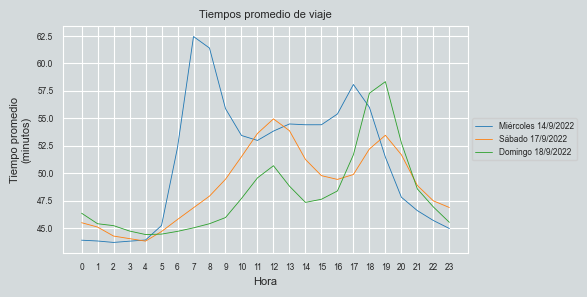

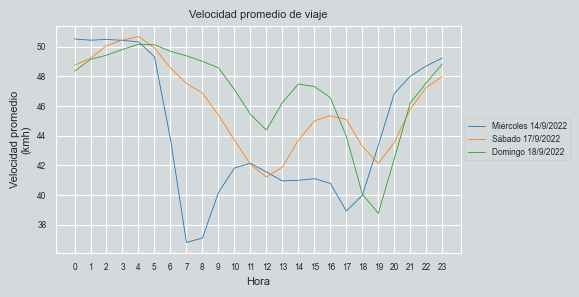

Detalle día,Domingo 18 de septiembre,Sábado 17 de septiembre,Miércoles 14 de septiembre
Date,2022-09-18,2022-09-17,2022-09-14
Hora Punta,19,12,07
Tiempo de viaje en hora punta (min),58.34,54.94,62.46
Velocidad de viaje en hora punta (kmh),38.77,41.22,36.81
Hora Valle,04,04,02
Tiempo de viaje en hora valle (min),44.4,43.8,43.68
Velocidad de viaje en hora valle (kmh),50.15,50.67,50.48
Índice de congestión,1.29,1.23,1.37
Tiempo promedio de los viajes (min),48.02,48.83,51.08
Velocidad promedio de los viajes (kmh),46.91,46.05,44.32


In [58]:
od_matrix_all_day = pyomu.calculate_od_matrix_all_day(origin = hexs, 
                                                        id_origin = 'hex', 
                                                        destination = densidad_actividad, 
                                                        id_destination = 'cluster',                     
                                                        trip_datetime = list_trip_datetime,  
                                                        population=population,
                                                        key = key,      
                                                        normalize=True,
                                                        current_path=current_path, 
                                                        city = city,
                                                        run_always=False,
                                                         samples_origin=12,
                                                        samples_destination=8)

# Pico mañana

In [62]:
od_matrix_osm = pyomu.access.measure_distances_osm(hexs.copy(), 
                                            'hex', 
                                            densidad_actividad, 
                                            'cluster', 
                                            current_path=current_path, 
                                            city=city)

od_matrix = pyomu.access.trips_gmaps_from_matrix(od_matrix = od_matrix_osm,
                                          trip_datetime = trip_datetime,
                                          key = key, 
                                          transit=True,
                                          driving=True,
                                          walking=False,
                                          bicycling=False,
                                          current_path=current_path, 
                                          normalize=False,
                                          city=city)
    
od_matrix.head()

Archivo temporal tmp\amba_trips_file_tmp_osm.csv
Proceso OSM finalizado
 Archivo temporal: tmp\amba_trips_file_tmp_transit_drive_2022-09-14.csv


Este proceso ya se corrió con anterioridad. Las consultas están guardadas en los archivos temporales
Puede borrar estos archivo si quiere correr nuevamente el proceso para este mismo día



,hex,cluster,hex_o,hex_d,area_m2,cant_pers,PCA_1,NSE_5,NSE_3,corona,weight,weight%,origin,origin_norm,destination,destination_norm,distance_osm_drive,distance_osm_walk,trip_datetime,transit_departure_time,transit_arrival_time,transit_distance,transit_duration,transit_walking_distance,transit_walking_duration,transit_walking_steps,transit_transit_distance,transit_transit_duration,transit_transit_steps,transit_walking_distance_origin,transit_walking_duration_origin,driving_distance,driving_duration,driving_duration_in_traffic
0,88c2e31267fffff,0,88c2e31267fffff,88c2e311e1fffff,511357.0,8.0,8.069897,5 - Bajo,3 - Bajo,CABA,25685.0,32.3,"-34.67274, -58.43999","-34.67274, -58.43999","-34.60037, -58.3939","-34.59836, -58.39779",10.67,10.92,2022-09-14 08:00:00,8:10am,9:04am,16.90,54.05,0.93,10.98,2.0,15.97,37.17,2.0,0.70,8.20,15.18,25.15,32.17
1,88c2e31267fffff,1,88c2e31267fffff,88c2e31137fffff,511357.0,8.0,8.069897,5 - Bajo,3 - Bajo,CABA,22572.0,28.4,"-34.67274, -58.43999","-34.67274, -58.43999","-34.60322, -58.37548","-34.60433, -58.37479",11.30,11.64,2022-09-14 08:00:00,8:04am,9:02am,17.77,57.37,0.72,8.43,2.0,17.06,44.23,2.0,0.70,8.20,16.14,25.12,32.77
2,88c2e31267fffff,2,88c2e31267fffff,88c2e30241fffff,511357.0,8.0,8.069897,5 - Bajo,3 - Bajo,CABA,5239.0,6.6,"-34.67274, -58.43999","-34.67274, -58.43999","-34.56364, -58.45471","-34.56323, -58.45701",14.54,14.53,2022-09-14 08:00:00,8:03am,9:15am,25.62,72.17,1.17,14.48,3.0,24.45,53.53,2.0,0.70,8.20,16.18,42.73,50.93
3,88c2e31267fffff,3,88c2e31267fffff,88c2e30767fffff,511357.0,8.0,8.069897,5 - Bajo,3 - Bajo,CABA,4138.0,5.2,"-34.67274, -58.43999","-34.67274, -58.43999","-34.46919, -58.51056","-34.47047, -58.50996",26.49,26.43,2022-09-14 08:00:00,8:04am,9:56am,37.74,111.48,1.50,18.45,4.0,36.25,75.55,3.0,0.70,8.20,35.21,45.38,62.42
4,88c2e31267fffff,4,88c2e31267fffff,88c2e3bacbfffff,511357.0,8.0,8.069897,5 - Bajo,3 - Bajo,CABA,4021.0,5.1,"-34.67274, -58.43999","-34.67274, -58.43999","-34.64872, -58.78889","-34.64607, -58.78521",34.44,35.23,2022-09-14 08:00:00,8:17am,9:58am,38.37,101.17,0.81,9.87,4.0,37.56,82.00,3.0,0.68,8.18,36.67,38.97,40.07


# Establecimientos

In [64]:
establecimientos = gpd.read_file(current_path / 'ciudades' / 'establecimientos.geojson')


if city=='amba':
    equipment_closest_qty = 1
else:
    equipment_closest_qty = 2

od_establecimientos = pyomu.access.distances_to_equipments( origin = hexs,
                                              destination = establecimientos, 
                                              id_origin = 'hex',
                                              id_destination = 'id',
                                              trip_datetime = trip_datetime,
                                              key = key,
                                              geo_origin = 'origin',
                                              geo_destination = 'destination',
                                              equipement_bring_closest = True,
                                              equipment_closest_qty = equipment_closest_qty,
                                              equipment_type = ['tipo', 'oferta'],
                                              normalize=True,
                                              closest_distance=[800, 1500, 2000],
                                              current_path = current_path,
                                              city=city)

od_establecimientos.head()


Calcula distancias en Open Street Maps
Archivo temporal tmp\amba_trips_file_tmp_osm.csv
Proceso OSM finalizado

Calcula tiempos en transporte público con Google Maps

 Archivo temporal: tmp\amba_trips_file_tmp_transit_norm_2022-09-14.csv


Este proceso ya se corrió con anterioridad. Las consultas están guardadas en los archivos temporales
Puede borrar estos archivo si quiere correr nuevamente el proceso para este mismo día




,hex,id,hex_o,hex_d,origin,destination,origin_norm,destination_norm,area_m2,cant_pers,PCA_1,NSE_5,NSE_3,corona,destino,nombre,tipo,oferta,distance_osm_drive,trip_datetime,modo,distance,duration,qty_est_800m,qty_est_1500m,qty_est_2000m
0,88c2e064b1fffff,915,88c2e064b1fffff,88c2e39acdfffff,"-34.93008, -58.49864","-34.88837, -58.5094","-34.93008, -58.49864","-34.8899, -58.51089",506955.0,27.0,1.516520,3 - Medio,2 - Medio,Segundo cordón,"-34.88837, -58.509396",JARDIN DE INFANTES HUMANOS,Educación Inicial,Privada,6.72,2022-09-14 08:00:00,walk,6.72,82.30,0,0,0
1,88c2e064b3fffff,915,88c2e064b3fffff,88c2e39acdfffff,"-34.92429, -58.50414","-34.88837, -58.5094","-34.92429, -58.50414","-34.8899, -58.51089",507002.0,18.0,1.574922,3 - Medio,2 - Medio,Segundo cordón,"-34.88837, -58.509396",JARDIN DE INFANTES HUMANOS,Educación Inicial,Privada,7.29,2022-09-14 08:00:00,walk,7.29,52.33,0,0,0
2,88c2e064b7fffff,915,88c2e064b7fffff,88c2e39acdfffff,"-34.9244, -58.49539","-34.88837, -58.5094","-34.9244, -58.49539","-34.8899, -58.51089",507068.0,47.0,1.574922,3 - Medio,2 - Medio,Segundo cordón,"-34.88837, -58.509396",JARDIN DE INFANTES HUMANOS,Educación Inicial,Privada,4.34,2022-09-14 08:00:00,walk,4.34,56.63,0,0,0
3,88c2e06693fffff,872,88c2e06693fffff,88c2e39067fffff,"-34.96948, -58.54759","-34.91559, -58.57757","-34.96948, -58.54759","-34.91444, -58.57583",505972.0,7.0,1.855349,4 - Medio-Bajo,2 - Medio,Segundo cordón,"-34.915587, -58.57757",NUEVA ESCUELA SPEGAZZINI,Educación Inicial,Privada,7.36,2022-09-14 08:00:00,walk,7.36,90.10,0,0,0
4,88c2e06c21fffff,3,88c2e06c21fffff,88c2e06527fffff,"-34.94375, -58.29507","-34.97985, -58.37533","-34.94375, -58.29507","-34.97721, -58.37588",508316.0,49.0,5.429209,5 - Bajo,3 - Bajo,Segundo cordón,"-34.979851, -58.375327",INSTITUTO EDUCATIVO DEL SUR,Educación Inicial,Privada,9.16,2022-09-14 08:00:00,walk,8.39,102.70,0,0,0


### Espacios verdes

In [66]:
hexs_green_space = pyomu.access.calculate_green_space(hexs, city_crs, population, max_distance = [1500, 2000])
hexs_green_space.sample(3)


,hex,area_m2,cant_pers,PCA_1,NSE_5,NSE_3,geometry,corona,lat_o,lon_o,hex_o,lat_o_norm,lon_o_norm,origin,origin_norm,green_area_ha_in1500m,green_area_m2_in1500m,green_pcapita_m2_in_1500m,green_area_ha_in2000m,green_area_m2_in2000m,green_pcapita_m2_in_2000m
4358,88c2e384d5fffff,511200.0,974.0,5.741907,5 - Bajo,3 - Bajo,"POLYGON ((-58.77251 -34.71140, -58.77628 -34.7...",Segundo cordón,-34.71524,-58.77177,88c2e384d5fffff,-34.71524,-58.77177,"-34.71524, -58.77177","-34.71524, -58.77177",2.5,26094,1.0,3.8,39769,1.0
4966,88c2e06dc7fffff,508701.0,49.0,5.429209,5 - Bajo,3 - Bajo,"POLYGON ((-58.29007 -34.92473, -58.28607 -34.9...",Segundo cordón,-34.92091,-58.29083,88c2e06dc7fffff,-34.92091,-58.29083,"-34.92091, -58.29083","-34.92091, -58.29083",0.0,0,0.0,0.0,0,0.0
301,88c2e38dadfffff,511324.0,7583.0,-0.954876,2 - Medio-Alto,2 - Medio,"POLYGON ((-58.53565 -34.62958, -58.53165 -34.6...",Primer cordón,-34.62573,-58.53639,88c2e38dadfffff,-34.62573,-58.53639,"-34.62573, -58.53639","-34.62573, -58.53639",11.4,114958,1.4,22.6,227446,1.5


# Visualización

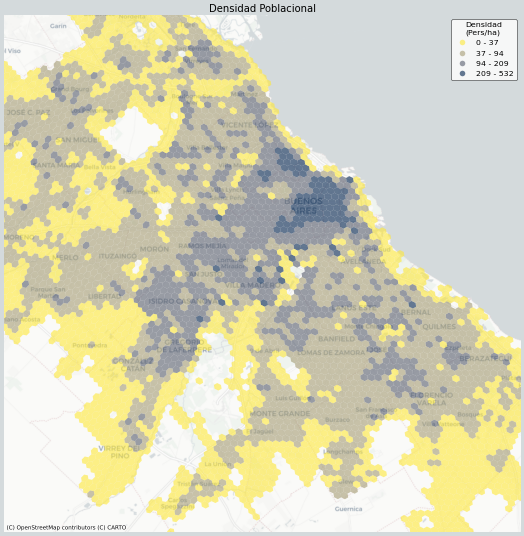

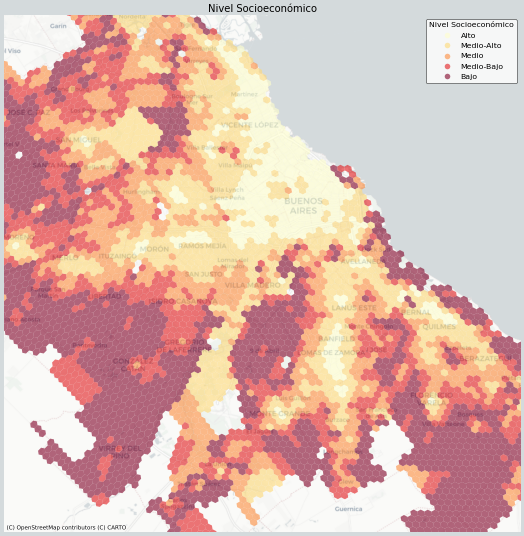

<Figure size 432x288 with 0 Axes>

In [67]:
pyomu.vizuals.print_density_nse(hexs, 
                        population=population,
                        current_path = current_path, 
                        city=city,
                            )

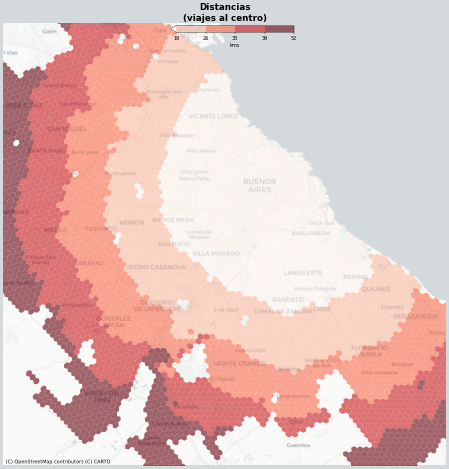

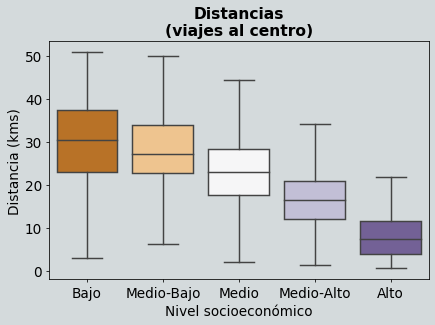

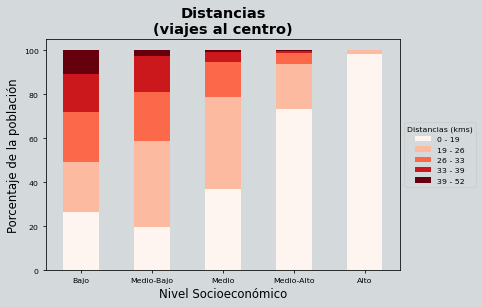

<Figure size 432x288 with 0 Axes>

In [69]:
od_matrix_avg = pyomu.vizuals.calculate_avg_time_distance(hexs, 
                                                    od_matrix,                             
                                                    population=population)

pyomu.vizuals.print_time_distance(hexs, 
                            od_matrix_avg, 
                            population=population,
                            indicators_vars=['distance_osm_walk_downtown'],
                            colors_dict={'distance_osm_walk_downtown':'Reds'},
                            current_path=current_path, 
                            city=city)

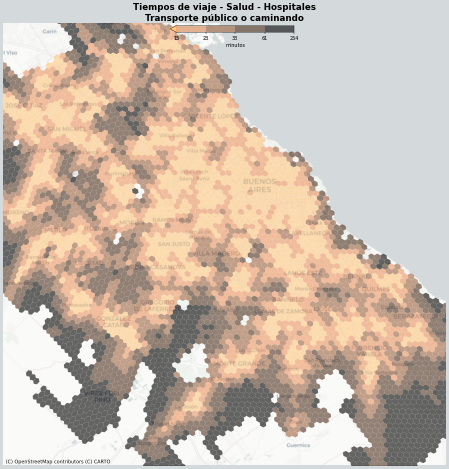

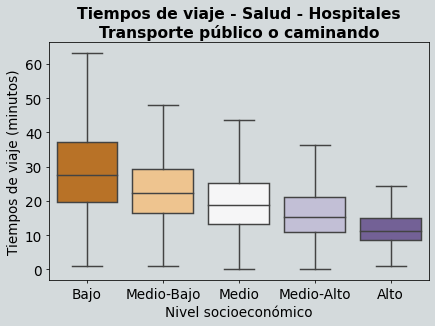

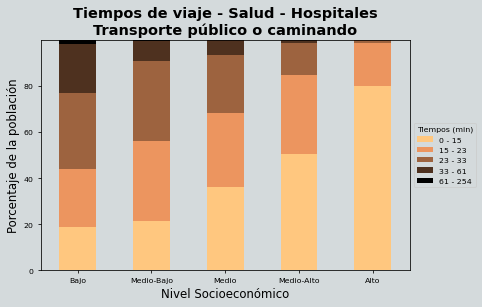

<Figure size 432x288 with 0 Axes>

In [70]:
pyomu.vizuals.print_time_distance(hexs, 
                        od_establecimientos[od_establecimientos.oferta=='Hospitales'], 
                        population=population,
                        indicators_vars=['duration'],
                        colors_dict={'duration':'Blues'},
                        equipment_type = ['tipo', 'oferta'],
                        current_path=current_path, 
                        city=city)

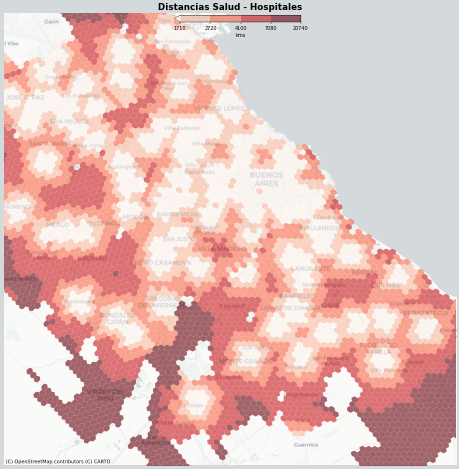

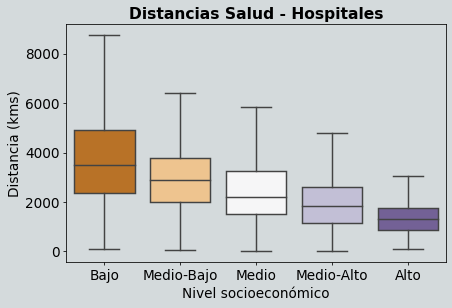

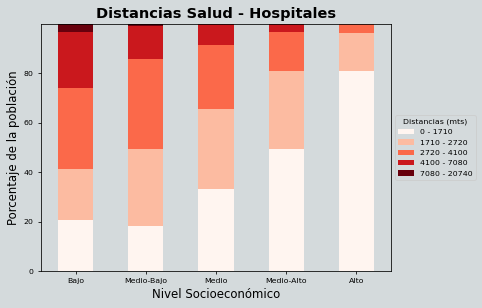

<Figure size 432x288 with 0 Axes>

In [71]:
pyomu.vizuals.print_time_distance(hexs, 
                        od_establecimientos[od_establecimientos.oferta=='Hospitales'], 
                        population=population,
                        indicators_vars=['distance'],
                        colors_dict={'distance':'Reds'},
                        equipment_type = ['tipo', 'oferta'],
                        current_path=current_path, 
                        city=city)

In [72]:
pyomu.vizuals.print_time_distance(hexs, 
                            hexs_green_space, 
                            population=population,
                            indicators_vars=['green_area_m2_in1500m'],
                            colors_dict={'green_area_m2_in1500m':'Greens'},                    
                            current_path=current_path)

# Crea powerpoints

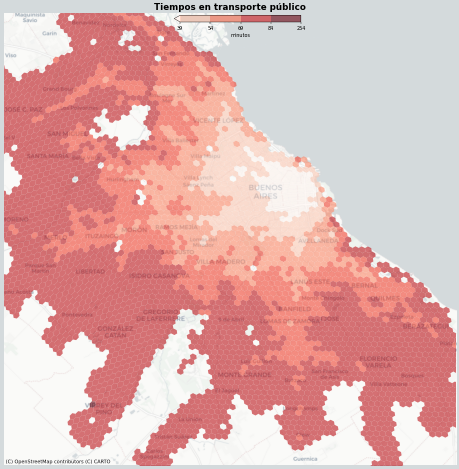

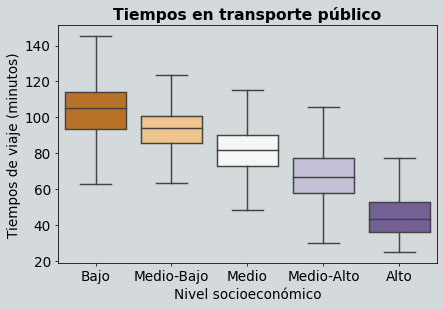

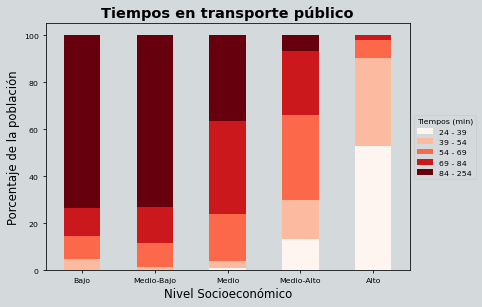

<Figure size 432x288 with 0 Axes>

In [73]:
od_matrix_avg = pyomu.vizuals.calculate_avg_time_distance(hexs, 
                                                    od_matrix,                             
                                                    population=population)

pyomu.vizuals.print_time_distance(hexs, 
                            od_matrix_avg, 
                            population=population,
                            indicators_vars=['transit_duration'],
                            colors_dict={'transit_duration':'Reds'},
                            current_path=current_path, 
                            city=city)

In [ ]:

# pyomu.vizuals.
pyomu.vizuals.create_pptx(hexs,
                  od_matrix_all_day,
                  od_matrix,
                  od_establecimientos,                  
                  hexs_green_space,
                  population=population,
                  equipment_type=['tipo', 'oferta'],
                  current_path = current_path, 
                  city=city,
                  title_ppt = title_ppt)


Densidad y nivel socioeconómico
Índicadores de día completo
Isocronas de tiempos y distancias
Establecimientos
